In [1]:
import numpy as np
import argparse
import imutils
import time
import cv2
import os
from matplotlib import pyplot as plt
from scipy.spatial import distance    
from sklearn.neighbors import KDTree 
import math
import time


In [5]:
landmark_array = []
landmark_DB = []
n=0

#x y angle first three and then x y features.
state_X = []

In [6]:
class landmark:
    pos = []
    i_d = -1
    life = 40
    totalTimesObserved = 0
    dist = 0
    bearing = 0
    
    rangeError = 0
    bearingError = 0
    
    def __init__(self, pos, i_d, dist):
    
        self.pos = pos
        self.i_d = i_d
        self.dist = dist

    

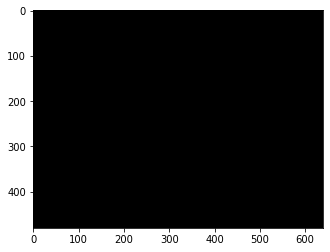

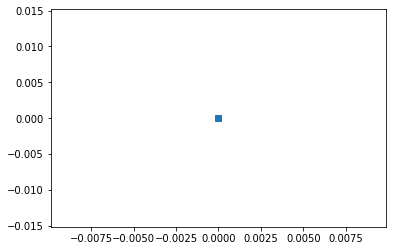

[508.0, 82432.0]


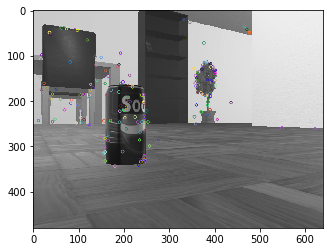

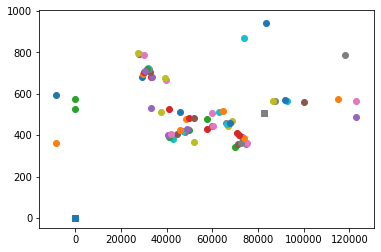

[508.0, 82432.0]


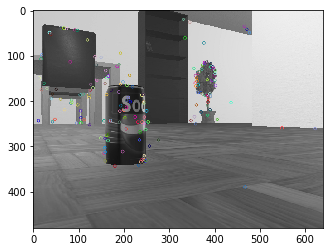

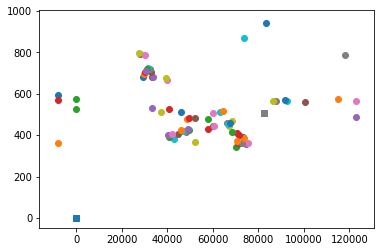

[508.0, 82432.0]


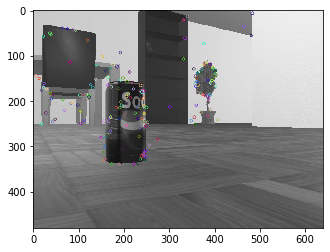

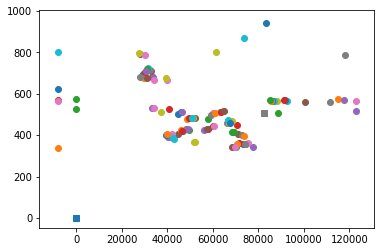

[508.0, 82432.0]


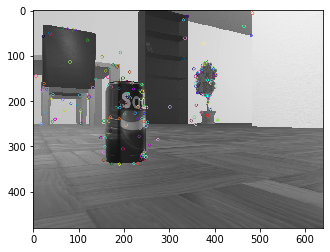

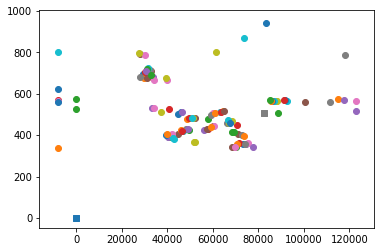

[508.0, 82432.0]


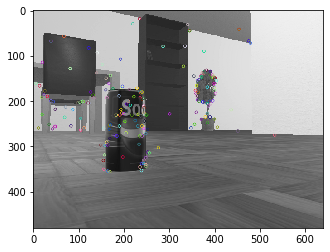

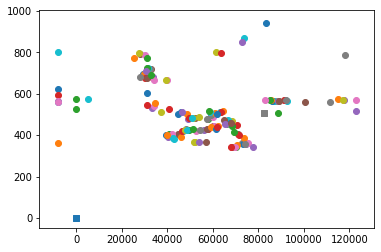

[508.0, 82432.0]


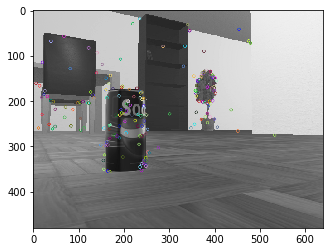

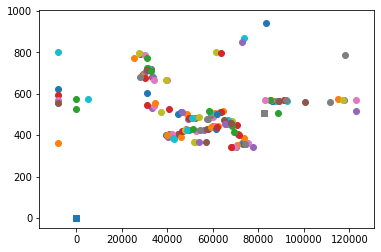

[508.0, 82432.0]


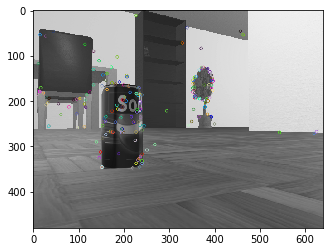

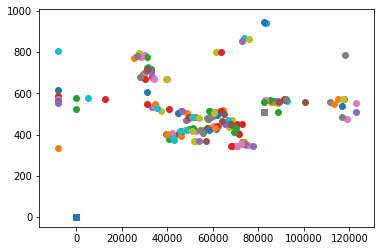

[508.0, 82432.0]


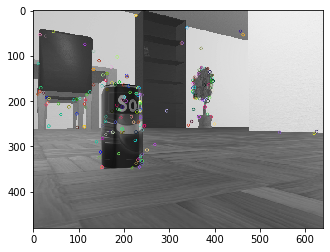

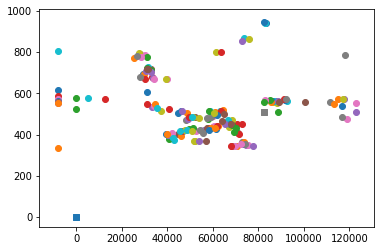

[508.0, 82432.0]


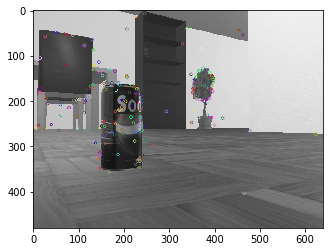

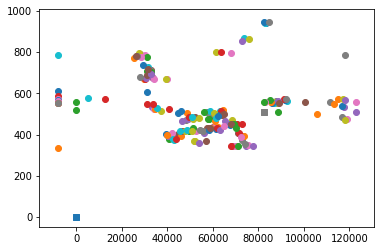

[508.0, 82432.0]


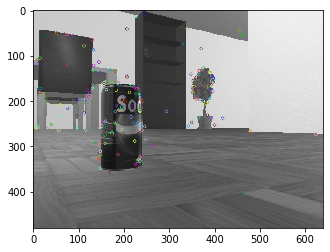

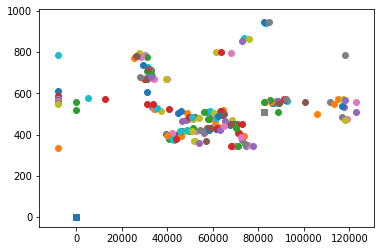

[508.0, 82432.0]


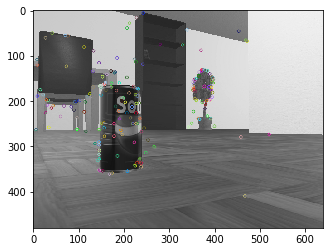

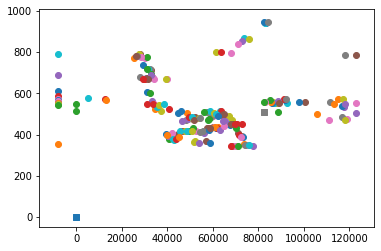

[508.0, 82432.0]


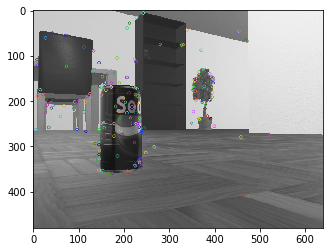

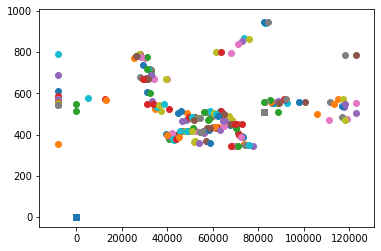

[508.0, 82432.0]


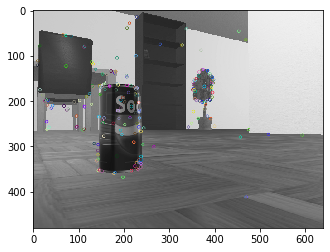

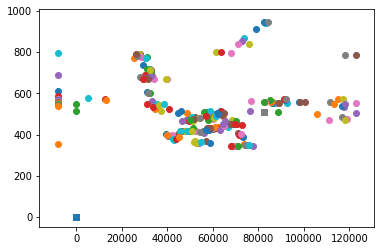

[508.0, 82432.0]


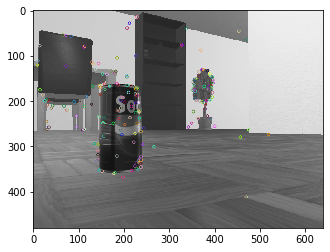

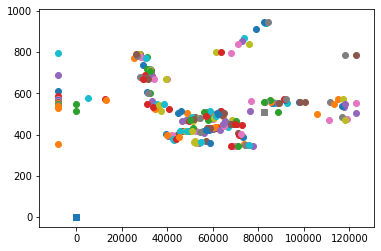

[508.0, 82432.0]


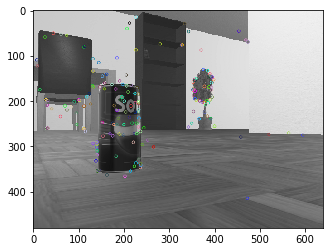

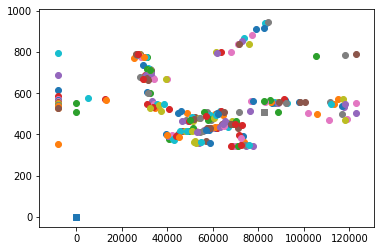

[508.0, 82432.0]


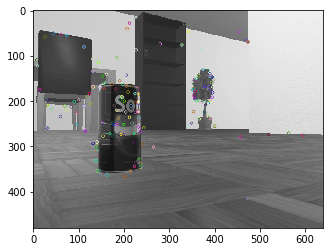

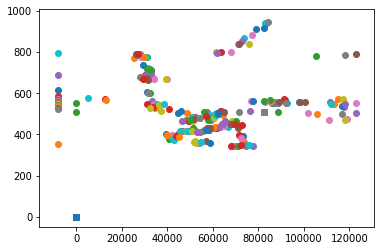

[508.0, 82432.0]


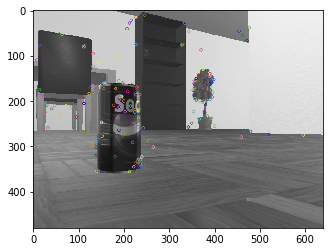

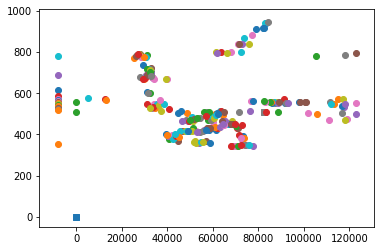

[508.0, 82432.0]


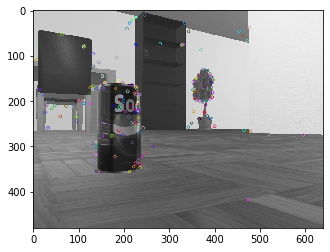

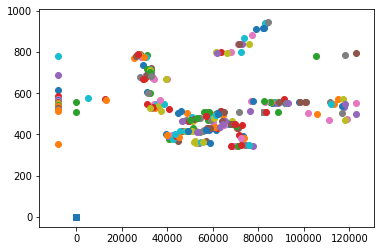

[508.0, 82432.0]


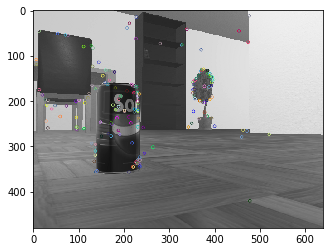

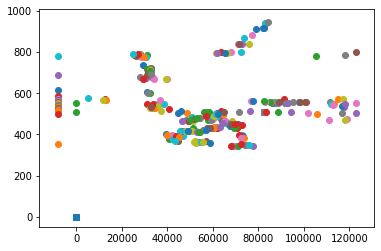

[508.0, 82432.0]


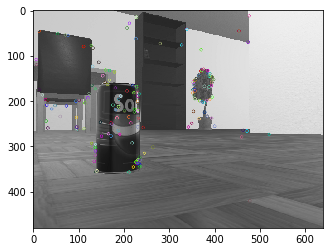

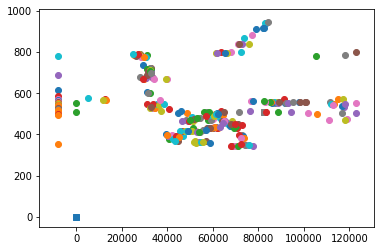

[508.0, 82432.0]


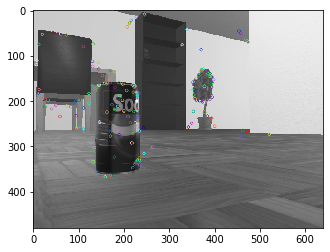

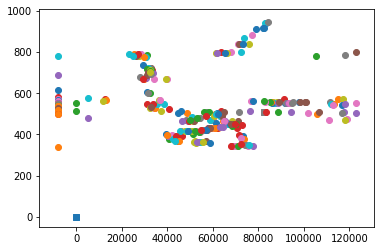

[508.0, 82432.0]


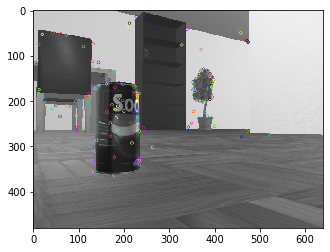

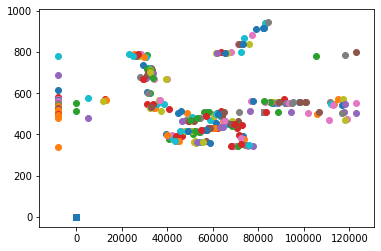

[508.0, 82432.0]


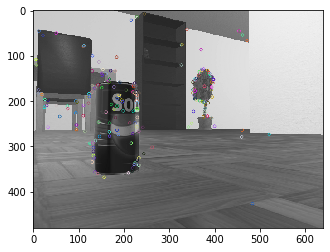

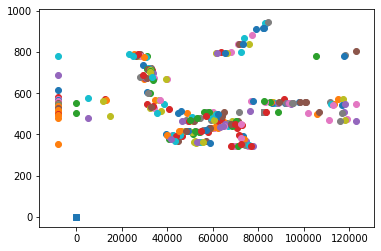

[508.0, 82432.0]


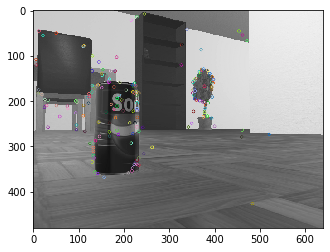

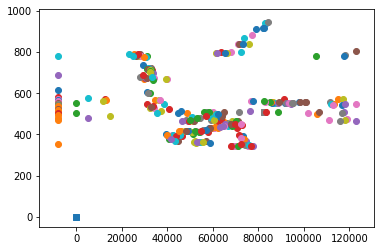

[508.0, 82432.0]


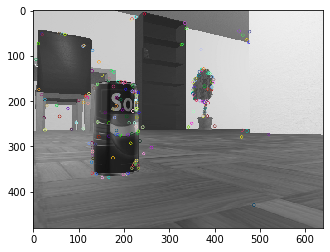

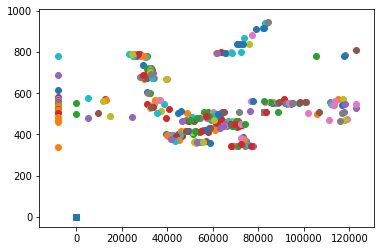

[508.0, 82432.0]


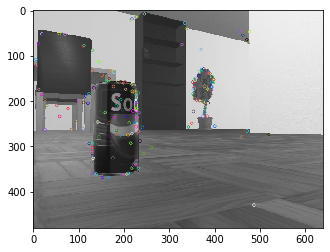

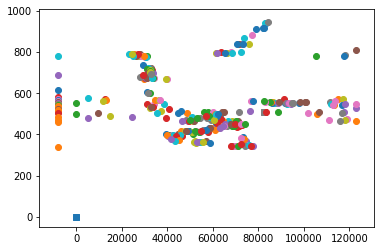

[508.0, 82432.0]


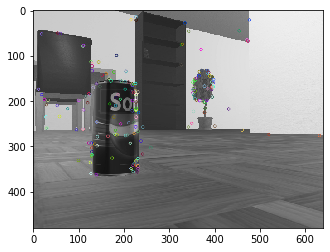

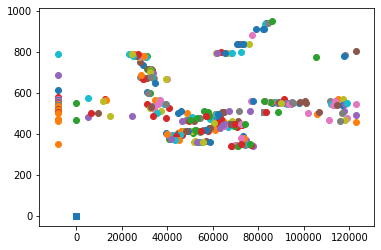

[508.0, 82432.0]


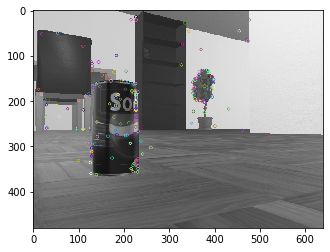

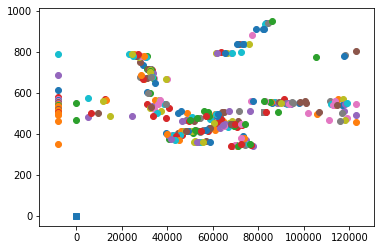

[508.0, 82432.0]


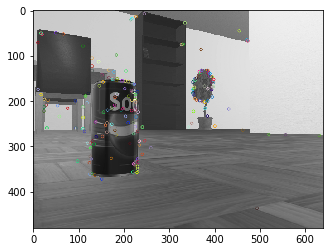

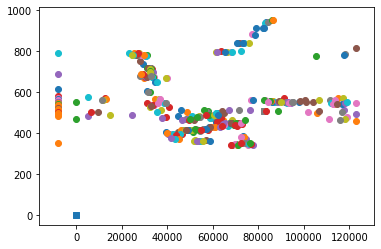

[508.0, 82432.0]


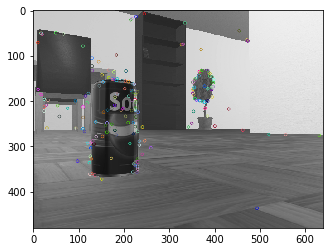

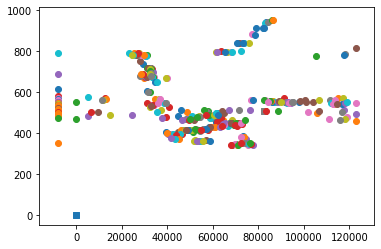

[508.0, 82432.0]


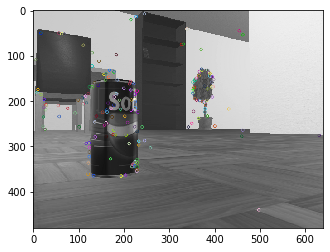

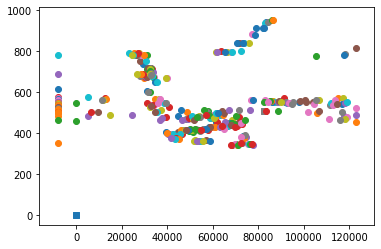

[508.0, 82432.0]


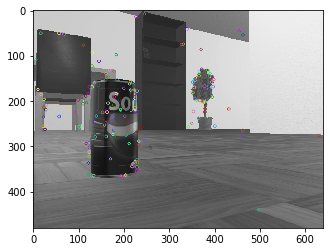

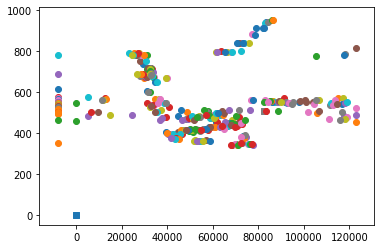

[508.0, 82432.0]


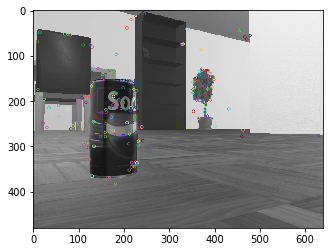

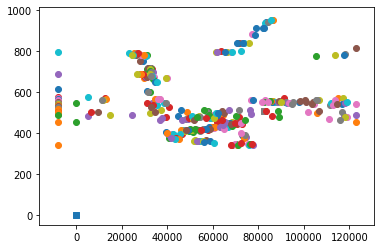

[508.0, 82432.0]


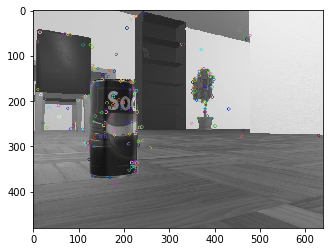

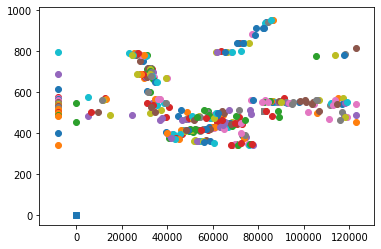

[508.0, 82432.0]


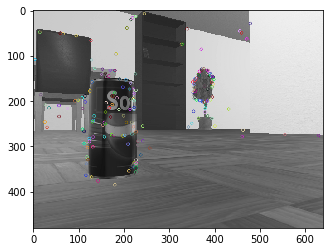

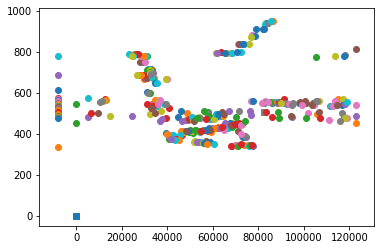

[508.0, 82432.0]


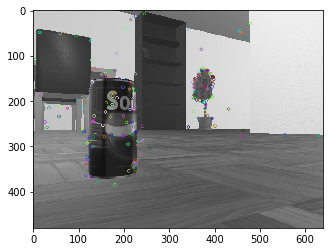

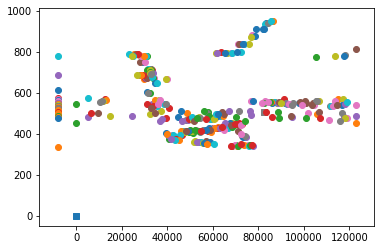

[508.0, 82432.0]


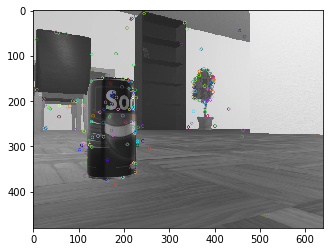

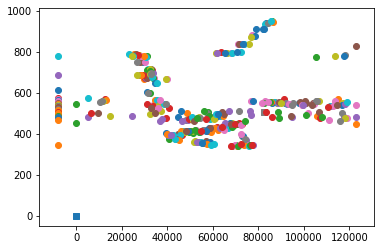

[508.0, 82432.0]


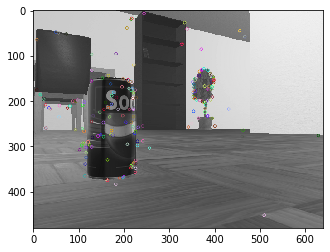

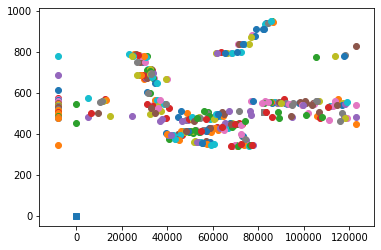

[508.0, 82432.0]


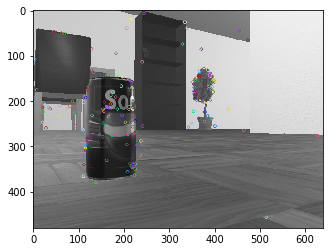

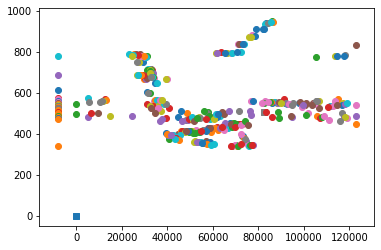

[508.0, 82432.0]


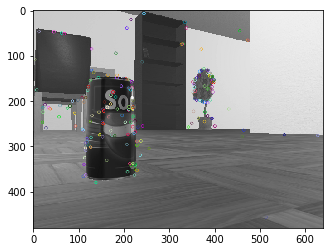

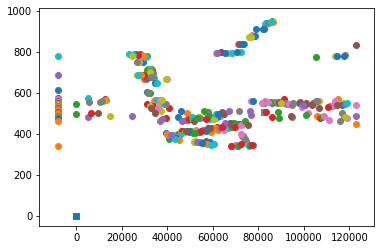

[508.0, 82432.0]


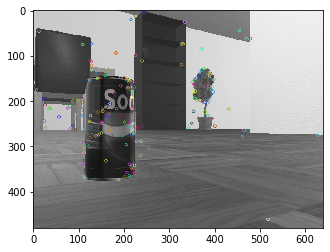

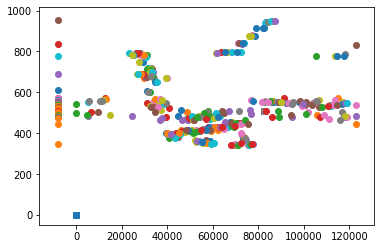

[508.0, 82432.0]


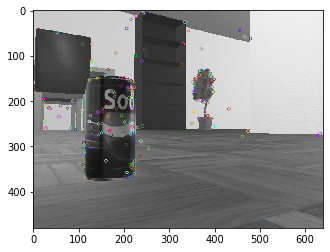

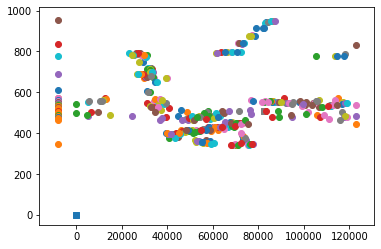

[508.0, 82432.0]


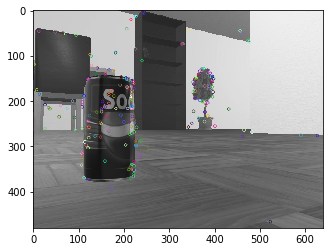

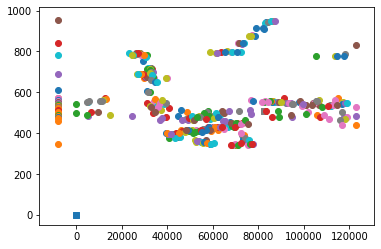

[508.0, 82432.0]


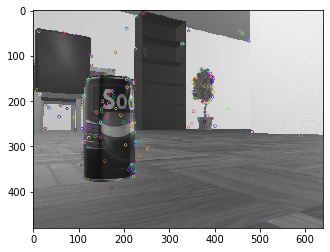

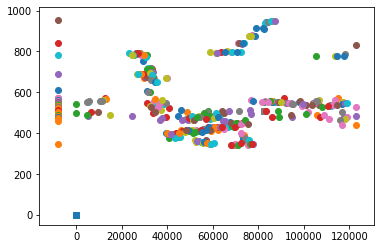

[508.0, 82432.0]


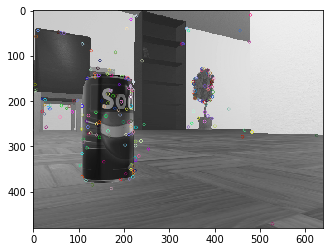

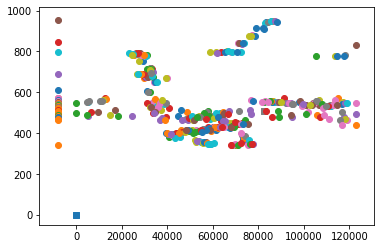

[508.0, 82432.0]


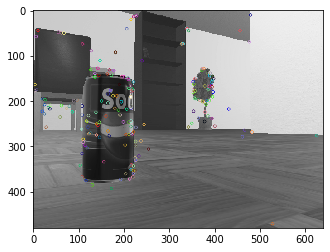

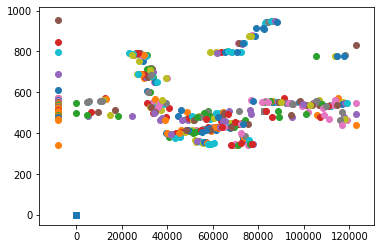

[508.0, 82432.0]


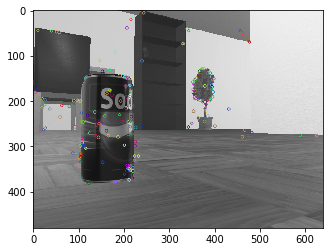

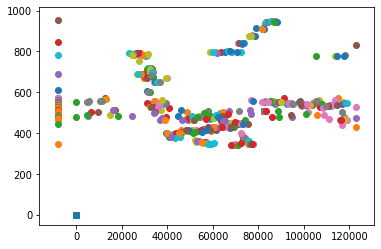

[508.0, 82432.0]


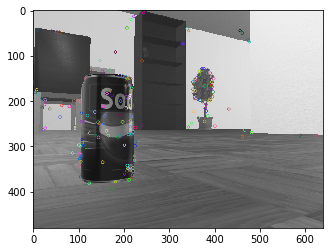

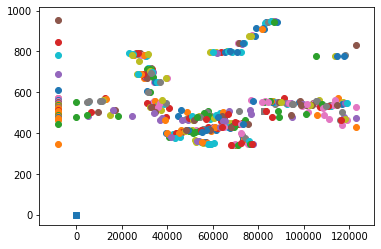

[508.0, 82432.0]


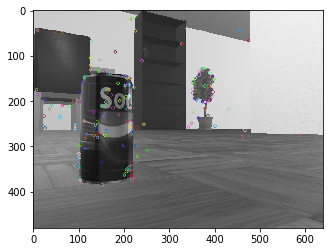

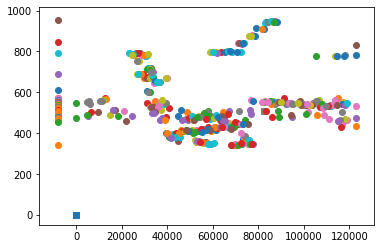

[508.0, 82432.0]


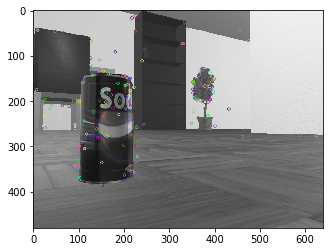

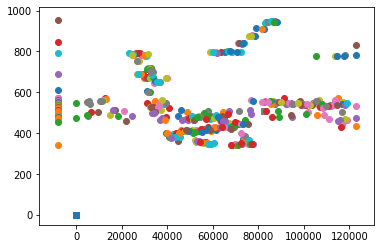

[508.0, 82432.0]


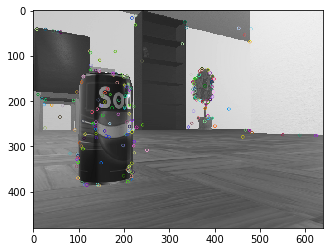

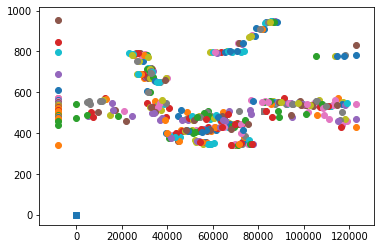

[508.0, 82432.0]


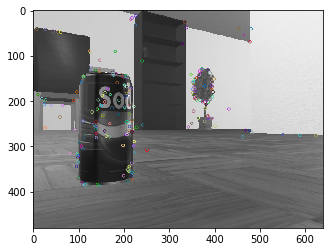

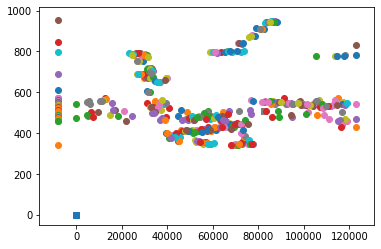

[508.0, 82432.0]


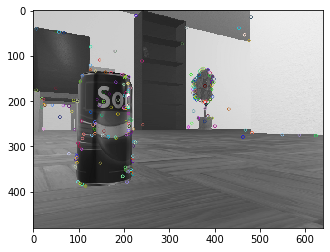

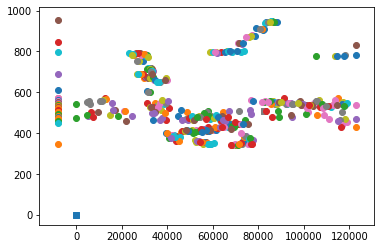

[508.0, 82432.0]


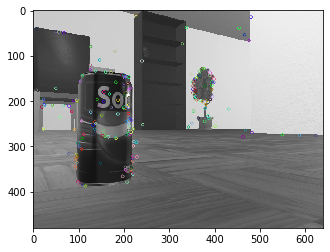

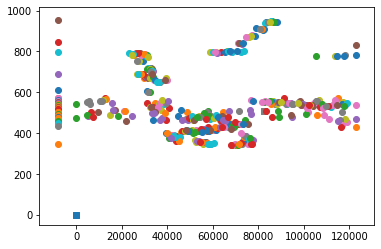

[508.0, 82432.0]


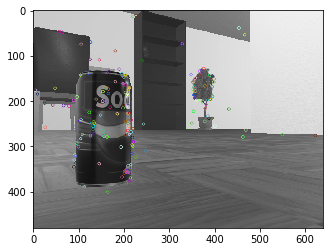

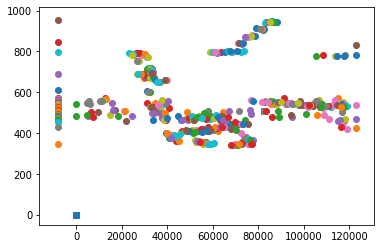

[508.0, 82432.0]


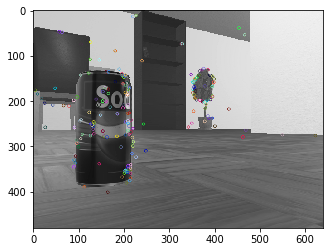

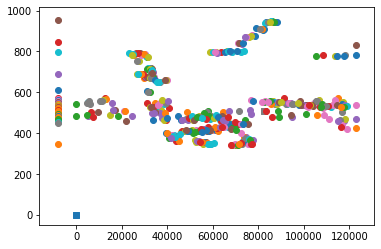

[508.0, 82432.0]


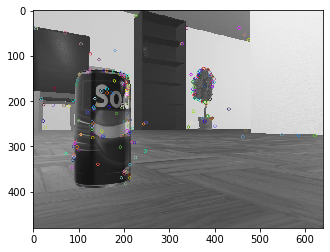

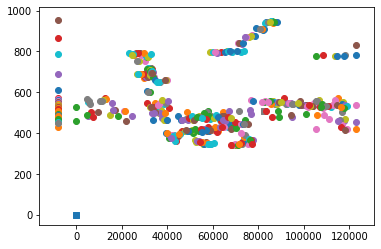

[508.0, 82432.0]


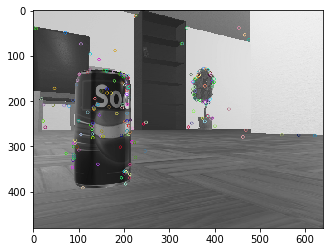

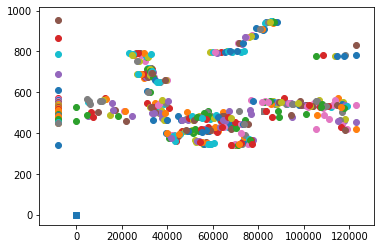

[508.0, 82432.0]


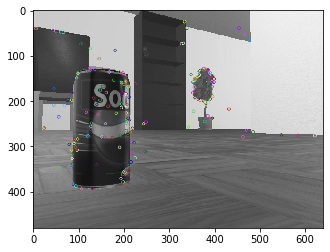

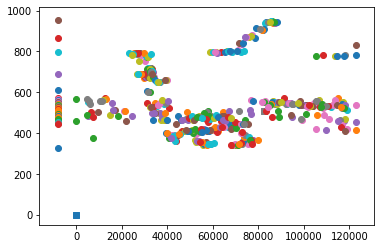

[508.0, 82432.0]


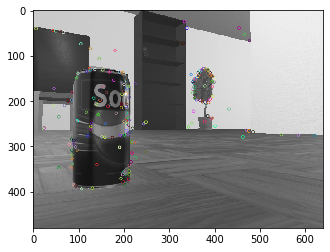

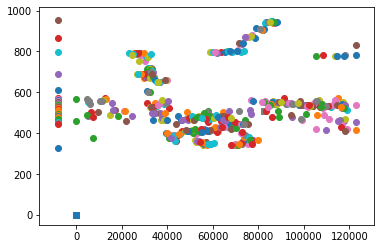

[508.0, 82432.0]


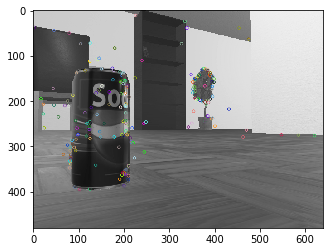

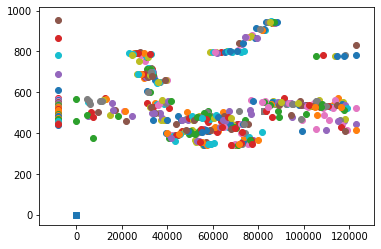

[508.0, 82432.0]


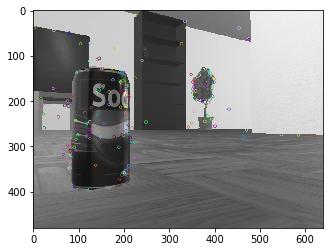

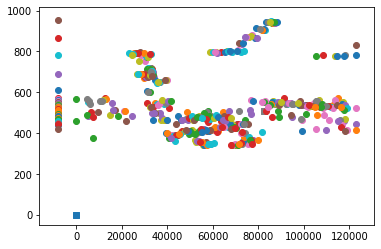

[508.0, 82432.0]


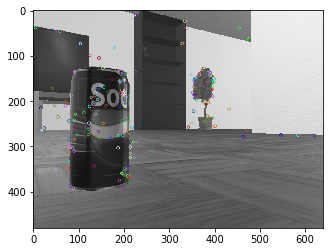

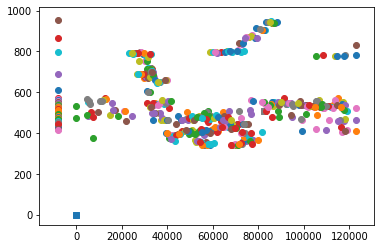

[508.0, 82432.0]


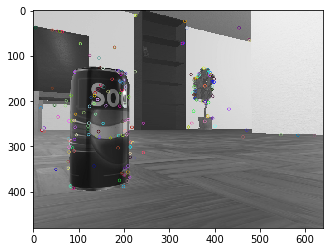

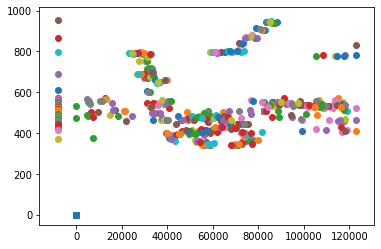

[508.0, 82432.0]


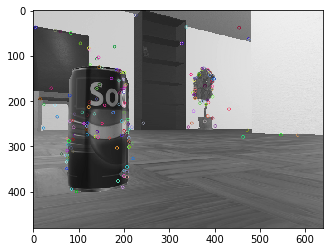

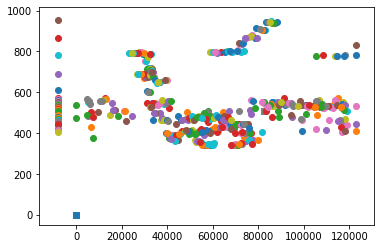

[508.0, 82432.0]


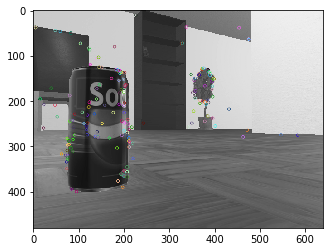

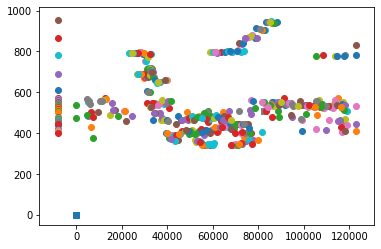

[508.0, 82432.0]


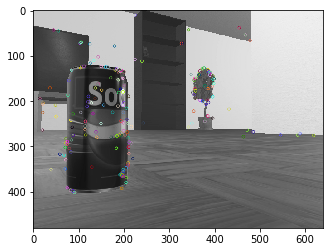

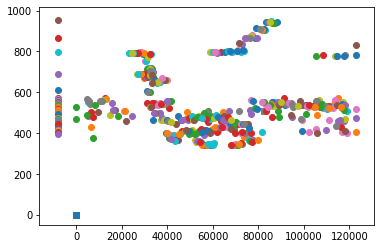

[508.0, 82432.0]


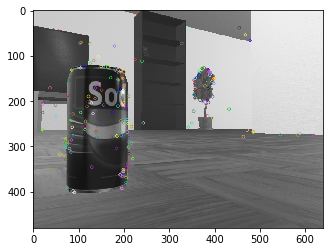

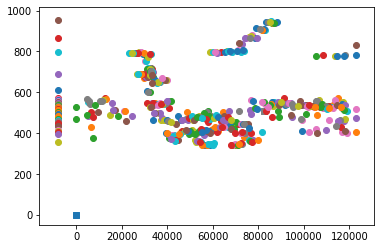

[508.0, 82432.0]


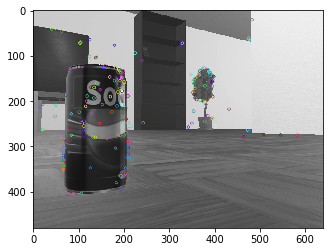

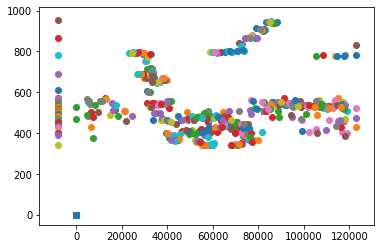

[508.0, 82432.0]


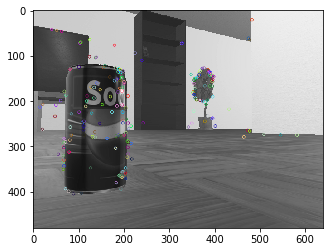

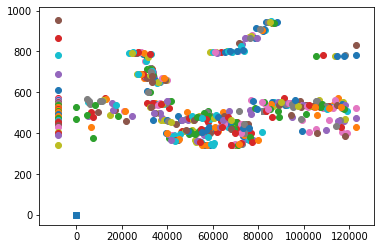

[508.0, 82432.0]


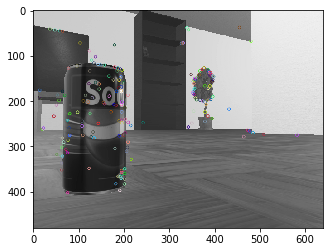

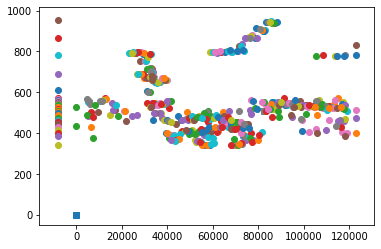

[508.0, 82432.0]


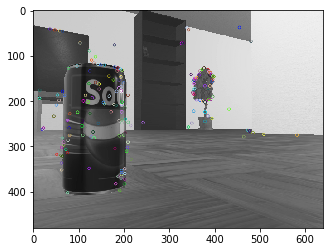

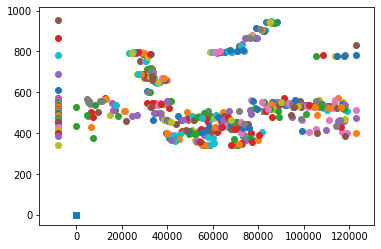

[508.0, 82432.0]


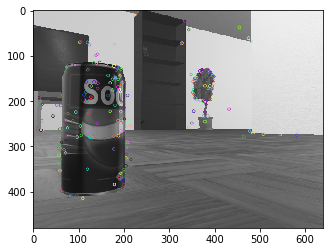

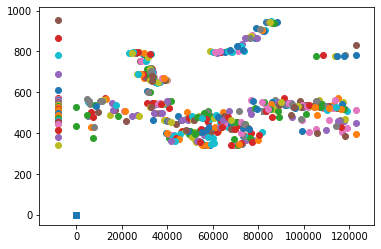

[508.0, 82432.0]


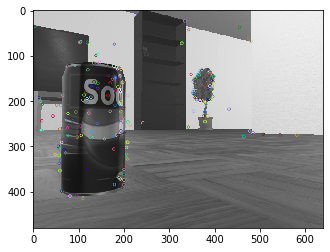

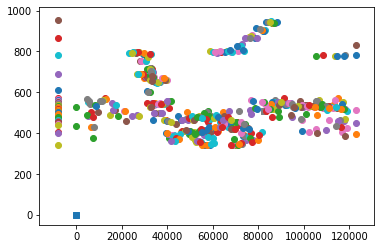

[508.0, 82432.0]


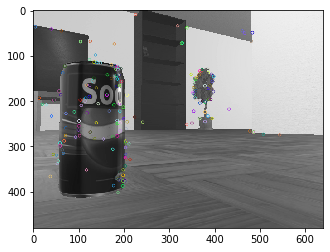

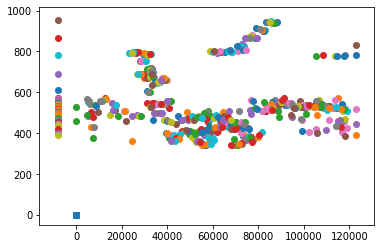

[508.0, 82432.0]


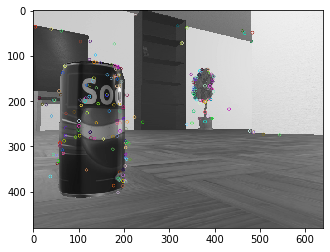

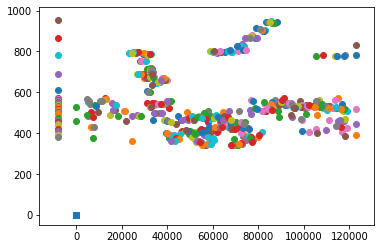

[508.0, 82432.0]


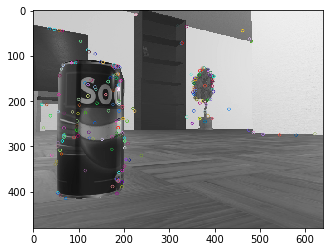

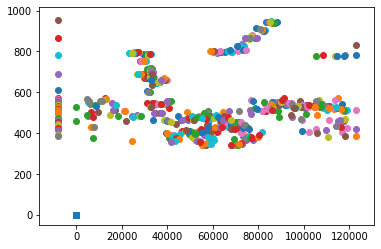

[508.0, 82432.0]


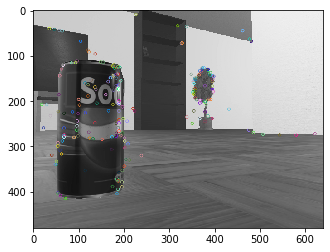

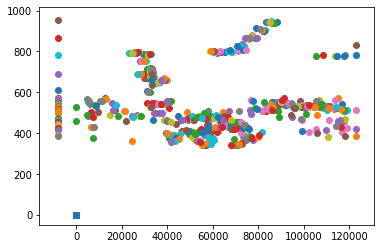

[508.0, 82432.0]


KeyboardInterrupt: 

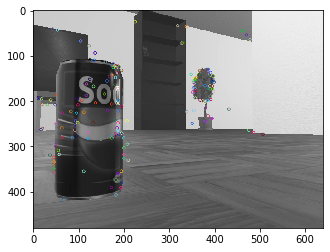

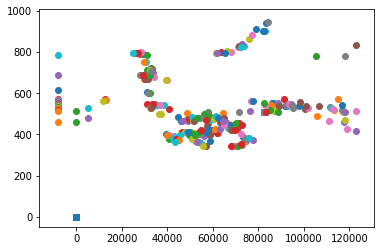

In [7]:
#first three entries in stateX is robots x, y and orientation
state_X.append(0)
state_X.append(0)
state_X.append(0)

vsLeft = cv2.VideoCapture('videos/left.avi')
vsRight = cv2.VideoCapture('videos/right.avi')
count = 0
pastFrame = None
while True:
    t0 = time.time()
    
    (grabbed, left) = vsLeft.read()
    (grabbed, right) = vsRight.read()
    
    if not grabbed:
        break
        
    frame = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY) 
    frame1 = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

    
    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
    disparity = stereo.compute(frame1, frame)
    
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(frame,None).copy() 
    img=cv2.drawKeypoints(frame,kp,left)
    plt.imshow(img)
    temp = [[int(k.pt[0]), int(k.pt[1])] for k in kp]
    
    pts = [] 
    [pts.append(x) for x in temp if x not in pts] 

    h, w = disparity.shape
    f = 0.8*w                          # guess for focal length
    Q = np.float32([[1, 0,  0, w / 2],
                    [0, -1,  0,  h / 2],  # turn points 180 deg around x-axis,
                    [0, 0, f,  0],  # so that y-axis looks up
                    [0, 0,  0,  1]])
    
    real_points = cv2.reprojectImageTo3D(disparity, Q)
    
#     print(len(pts))
    for sift_point in range(len(pts)):

        #put landmark in real world coordinates.
        xyz = real_points[pts[sift_point][1], pts[sift_point][0]]
        pos = [xyz[0], xyz[2]]
        dist = xyz[2]

        #create the landmark
        lm = landmark(pos, sift_point, dist)

        #try to find this landmark in our database
        closestDist = 9999
        closestId = -1
        idx = -1
        for db_landmark in range(len(landmark_array)):

            distanceToLandmark = math.sqrt(math.pow(lm.pos[0]-landmark_array[db_landmark].pos[0],2) + math.pow(lm.pos[1]-landmark_array[db_landmark].pos[1], 2))

            if distanceToLandmark < closestDist:
                closestDist = distanceToLandmark
                closestId = landmark_array[db_landmark].i_d
                idx = db_landmark
        #validation gate
        #might need to do something to stop duplicates.
        if closestDist < 50:
#             if closestId == 0:
#                 print(closestDist)
            landmark_array[idx].totalTimesObserved += 1
            landmark_array[idx].pos = lm.pos
            landmark_array[idx].dist = lm.dist

        else:

            landmark_array.append(lm)

#         if landmark_array[closestId].totalTimesObserved > 5:

#             closestDist = 9999

#             lm = landmark_array[closestId]

#             for db in range(len(landmark_DB)):
#                 distanceToLandmark = math.sqrt(math.pow(lm.pos[0]-landmark_DB[db].pos[0],2) + math.pow(lm.pos[1]-landmark_DB[db].pos[1], 2))

#                 if distanceToLandmark < closestDist:
#                     closestDist = distanceToLandmark
#                     closestId = landmark_DB[db].i_d
#                     closestIdx = db
#             #validation gate
#             #might need to do something to stop duplicates.
#             if closestDist < 1:
#                 landmark_DB[db].totalTimesObserved += 1

#             else:

#                 landmark_DB.append(lm)


    
    
    
    
    
    t1 = time.time()
#     print("time for frame {}".format(t1-t0))
    
    fig,ax = plt.subplots() #create figure and axes
    
    n = len(landmark_array)

    ax.scatter(0, 0,marker='s')
    for i in range(len(landmark_array)):
        if i == 36:
            print(landmark_array[i].pos)
            ax.scatter(landmark_array[i].pos[1], landmark_array[i].pos[0], marker='s')
        else:
            ax.scatter(landmark_array[i].pos[1], landmark_array[i].pos[0])
            
        state_X.append(landmark_array[i].pos[0])
        state_X.append(landmark_array[i].pos[1])

        #now plot data set i
        

    plt.show()
    
#     if count == 10:
#         break
    count += 1
    
vsLeft.release()
vsRight.release()





In [ ]:
state_X

In [ ]:
for i in range(len(landmark_array)):
    if landmark_array[i].dist > 0:
        print(i)

In [ ]:
idx = real_points.shape[0]
blah = real_points.shape[1]
print(real_points[int(idx/2),int(blah/2)])

In [ ]:

for sift_point in range(len(pts)):

    #put landmark in real world coordinates.
    xyz = real_points[pts[sift_point][1], pts[sift_point][0]]
    pos = [xyz[0], xyz[1]]
    dist = xyz[2]
    
    #create the landmark
    lm = landmark(pos, sift_point, dist)

    #try to find this landmark in our database
    closestDist = 9999
    closestId = -1
    for db_landmark in range(len(landmark_array)):
        
        distanceToLandmark = math.sqrt(math.pow(lm.pos[0]-landmark_array[db_landmark].pos[0],2) + math.pow(lm.pos[1]-landmark_array[db_landmark].pos[1], 2))
        
        if distanceToLandmark < closestDist:
            closestDist = distanceToLandmark
            closestId = landmark_array[db_landmark].i_d
    #validation gate
    #might need to do something to stop duplicates.
    if closestDist < 0.1:
        landmark_array[closestId].totalTimesObserved += 1
            
    else:
        
        landmark_array.append(lm)
        
    if landmark_array[closestId].totalTimesObserved > 5:
        
        closestDist = 9999

        lm = landmark_array[closestId]
        
        for db in range(len(landmark_DB)):
            distanceToLandmark = math.sqrt(math.pow(lm.pos[0]-landmark_DB[db].pos[0],2) + math.pow(lm.pos[1]-landmark_DB[db].pos[1], 2))

            if distanceToLandmark < closestDist:
                closestDist = distanceToLandmark
                closestId = landmark_DB[db].i_d
        #validation gate
        #might need to do something to stop duplicates.
        if closestDist < 0.1:
            landmark_DB[closestId].totalTimesObserved += 1

        else:

            landmark_DB.append(lm)

    

In [ ]:
n = len(landmark_DB)
fig,ax = plt.subplots() #create figure and axes
    
ax.scatter(0, 0,marker='s')

for i in range(n):
    #now plot data set i
    ax.scatter(landmark_DB[i].pos[0], landmark_DB[i].pos[1])
    
plt.show()

In [ ]:
landmark_DB

In [ ]:
landmark_array